# Energy balance considerations for static cold dark matter spikes, according to https://arxiv.org/pdf/2002.12811

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rc('font', family = 'roman')
import scipy

from SMBHBpy import constants as c

### Define SMBH binary and CDM spikes

In [2]:
# SMBH masses
m = np.array([1e5, 1e7]) * c.solar_mass_to_pc
M = 2*m

sigma = 200 * 1e3 * c.m_to_pc/c.s_to_pc


# Influence radius and spike parameters
gamma_sp = 7/3
r_h = m/sigma**2
r_sp = 0.2*r_h

rho_sp = (3-gamma_sp)*0.2**(3-gamma_sp)*m/(2*np.pi*r_sp**3)

# r_in = r_ISCO
r_in = 6*m

def m_DM(r, i):
    return 4*np.pi*rho_sp[i]*r_sp[i]**gamma_sp/(3-gamma_sp)*r**(3-gamma_sp)

In [4]:
# Total potential energy of both CDM spikes within radius r for each considered SMBHB
def U_DM(r, i):
    U_in = - m_DM(r_in[i],i)*(3-gamma_sp)/(r_in[i]*(2-gamma_sp))*(m[i]-m_DM(r_in[i],i)*(3-gamma_sp)/(5-2*gamma_sp))
    return 2*(- m_DM(r, i)*(3-gamma_sp)/r*((m[i]-m_DM(r_in[i], i))/(2-gamma_sp)+m_DM(r, i)/(5-2*gamma_sp))-U_in)

In [5]:
# Total energy dissipated through dynamical friction between SMBHB and the corresponding CDM spikes
log_Lambda = 10

c_r = 8*M**(3/2)*m**2/(5*np.pi*rho_sp*r_sp**gamma_sp*log_Lambda)

def DeltaE_DF(r, i):
    return m[i]**2/(2*r)*scipy.special.hyp2f1(1, 2/(11-2*gamma_sp), (13-2*gamma_sp)/(11-2*gamma_sp), -c_r[i]*r**(-11/2+gamma_sp))

def DeltaE_DF_val(r_i, r_f, i):
    return DeltaE_DF(r_i, i)-DeltaE_DF(r_f, i)

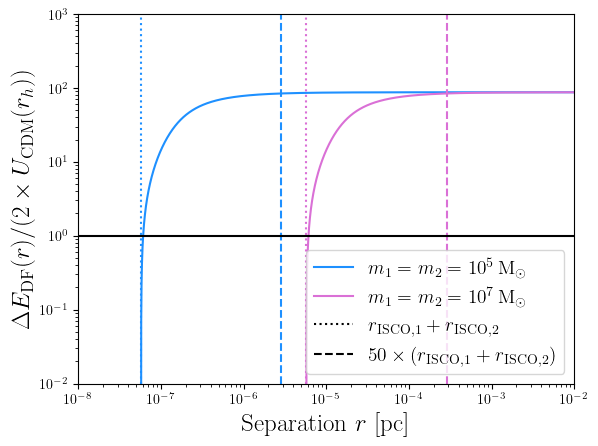

In [6]:
# Plot the ratio between energy dissipated through dynamical friction during inspiral from arbitrary r to r_ISCO,1+r_ISCO,2 
# and total binding energy of CDM spikes

r = np.logspace(-10, 0, int(1e4))

fig, ax1 = plt.subplots()
label_mass = [" $10^5\,\mathrm{M_{\odot}}$", " $10^7\,\mathrm{M_{\odot}}$"]
colors = ["dodgerblue", "orchid"]

for i in range(2):
    plt.loglog(r, DeltaE_DF_val(r, 2*r_in[i], i)/U_DM(r_h[i], i), label = "$m_1 = m_2 = $"+label_mass[i], color = colors[i])
    plt.axvline(x=2*r_in[i], color = colors[i], linestyle = "dotted")
    plt.axvline(x=50*2*r_in[i], color = colors[i], linestyle = "--")
    
plt.loglog(1,1,label = r"$r_{\mathrm{ISCO,1}}+r_{\mathrm{ISCO,2}}$", color = "black", linestyle = "dotted")
plt.loglog(1,1,label = r"$50\times (r_{\mathrm{ISCO,1}}+r_{\mathrm{ISCO,2}})$", color = "black", linestyle = "--")
plt.legend(loc='lower right', fontsize = 14)
plt.xlabel(r"Separation $r$ [pc]", fontsize = 18)
plt.ylabel(r"$\Delta E_{\mathrm{DF}}(r)/(2\times U_{\mathrm{CDM}}(r_h))$", fontsize = 18)
plt.axhline(y=1, color = "black", linestyle = "solid")
plt.ylim(1e-2, 1e3)
plt.xlim(1e-8,1e-2);